# Praca domowa nr 2 ,,Planowanie i analiza eksperymentu''
wykonał Paweł Jan Tłusty
s95596
Zestaw zadań dla grupy 1.1

Wersja online: Notes dostępny również w serwisie GitHub (niektóre wykresy niewłaściwie dzedziczą style, zaleca zaleca się jasny motyw lub otwieranie poszczególnych wykresów jako obraz w nowej karcie) 


Link:

https://github.com/Kotmin/R-Planowanie-Eksperymentu

Dla wszystkich zadań, o ile nie zaznaczono inaczej, przyjmujemy domyślny poziom istotności **αlpha = 0.05**. W przypadkach, gdzie zostaje on zmieniony (np. alpha = 0.01), informujemy o tym lokalnie przy interpretacji wyników.

$$
\alpha = 0.05
$$





## Zadanie 1: Porównanie średnich wag mandarynek z dwóch plantacji

#### Dane:
- Waga1 = c(75, 67, 73, 78, 70, 78, 84, 75, 70, 72, 78)
- Waga2 = c(80, 75, 82, 76, 78, 82, 80, 85, 76, 72)

#### Cel:
Sprawdzić, czy średnia waga mandarynek z dwóch plantacji jest taka sama.

#### Hipotezy:
- **H₀ (hipoteza zerowa):** Średnia waga mandarynek z plantacji 1 = średnia waga z plantacji 2
- **H₁ (hipoteza alternatywna):** Średnie są różne


In [16]:
waga1 <- c(75, 67, 73, 78, 70, 78, 84, 75, 70, 72, 78)
waga2 <- c(80, 75, 82, 76, 78, 82, 80, 85, 76, 72)

In [17]:
length(waga1); length(waga2) # Rozmiary prób

[1] 11

[1] 10

In [18]:
mean(waga1); var(waga1)
mean(waga2); var(waga2)

[1] 74.54545

[1] 23.27273

[1] 78.6

[1] 15.37778

In [19]:
waga1

[1] 75 67 73 78 70 78 84 75 70 72 78

In [20]:
waga2

[1] 80 75 82 76 78 82 80 85 76 72

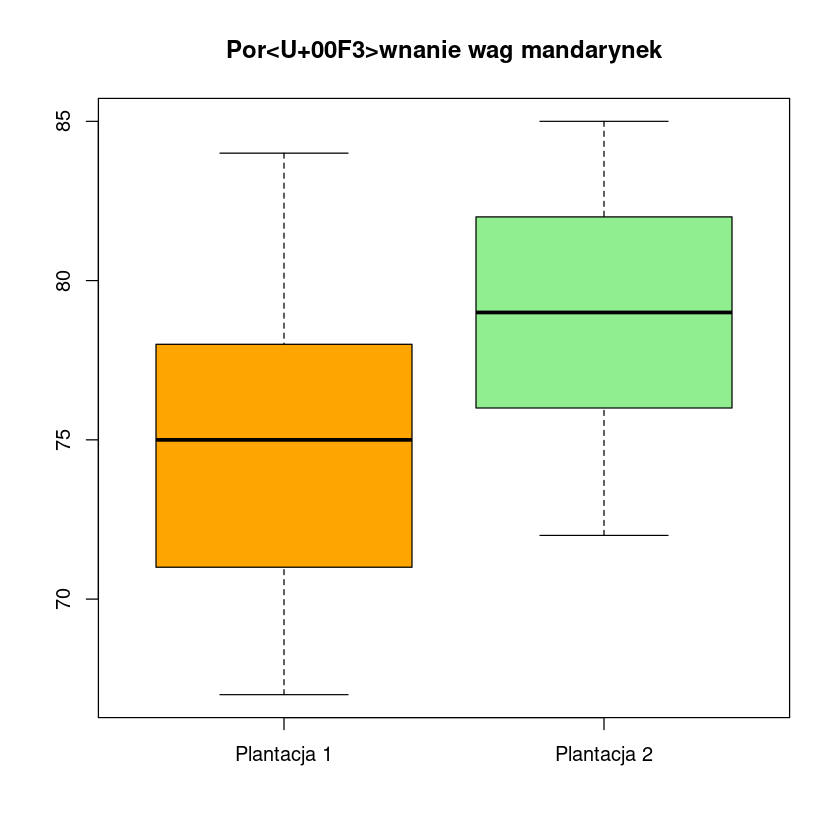

In [21]:
boxplot(waga1, waga2, names = c("Plantacja 1", "Plantacja 2"), col = c("orange", "lightgreen"), main = "Porownanie wag mandarynek")

In [22]:
# par(mfrow = c(2, 1))

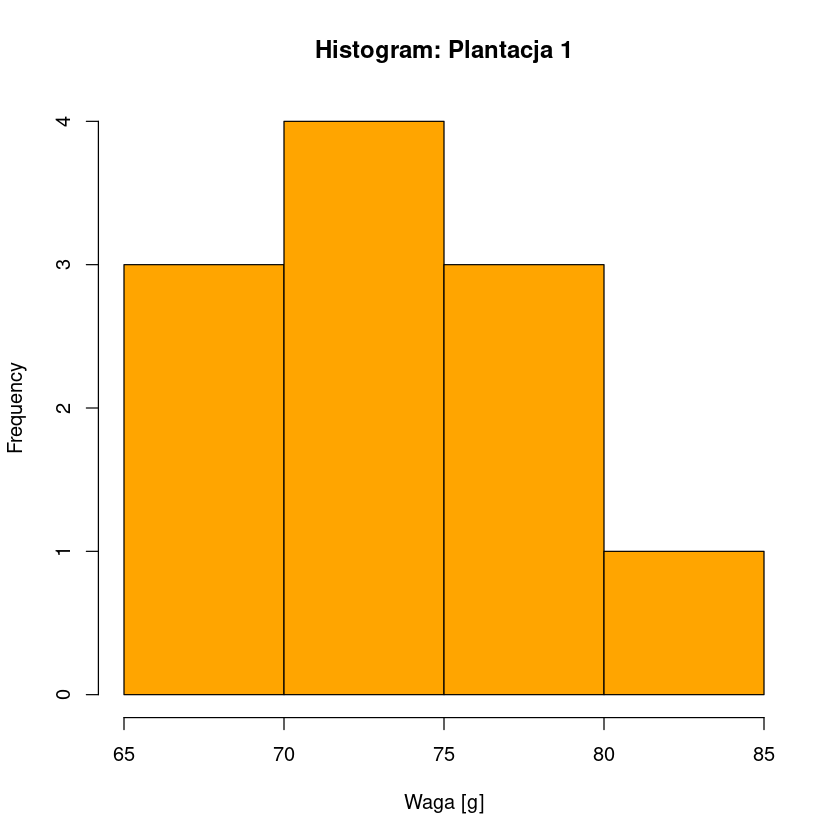

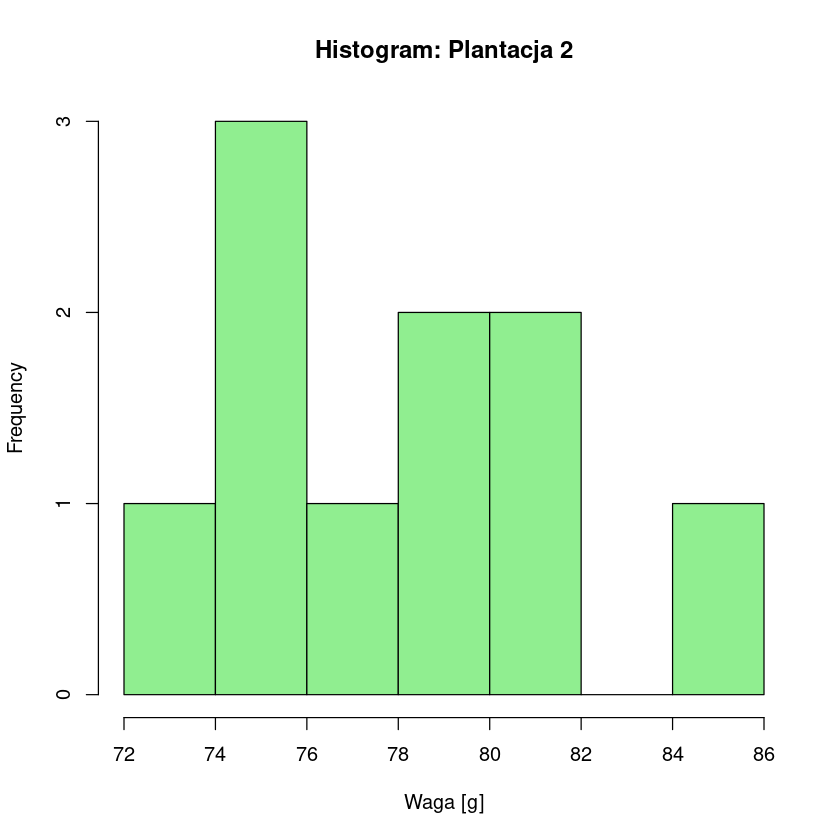

In [23]:
hist(waga1, main = "Histogram: Plantacja 1", col = "orange", xlab = "Waga [g]")
hist(waga2, main = "Histogram: Plantacja 2", col = "lightgreen", xlab = "Waga [g]")

In [26]:
# sprawdźimy czy dane mają rozkład normalny
# używamy testu Shapiro-Wilka (próbki są małe)
# test SW jest skonstruowany z hipotezami:
# H0: dane pochodzą z rozkładu normalnego
# H1: dane nie pochodzą z rozkładu normalnego / dane są istotne różne od rozkładu normalnego

shapiro.test(waga1)
shapiro.test(waga2)


	Shapiro-Wilk normality test

data:  waga1
W = 0.96419, p-value = 0.8227



	Shapiro-Wilk normality test

data:  waga2
W = 0.97536, p-value = 0.9356


In [29]:
# p-value większe od 0.05 --dla obu przypadków.
# nie znaleźliśmy podstaw do odrzucenia hipotezy zerowej. Dane pochodzą z rozkładu normalnego
# gdyby dane nie pochodizły z r.norm. użylibyśmy zapewne testu wilcoxona dla średnich, dla zgodności z rozkładem normalnym użyjemy
# dobranej wersji t-test
# w celu doboru sprawdźmy wariancję
var.test(waga1, waga2)
# h0 wariancje są równe
# h1 wariancje się różnią



	F test to compare two variances

data:  waga1 and waga2
F = 1.5134, num df = 10, denom df = 9, p-value = 0.545
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.381799 5.719082
sample estimates:
ratio of variances 
            1.5134 


In [30]:
# wariancje są znane, nie znaleźliśmy podstaw do odrzucenia hipotezy zerowej. Wariancje nie różnią się istotnie statycznycznie
t.test(waga1, waga2, var.equal = TRUE)



	Two Sample t-test

data:  waga1 and waga2
t = -2.0996, df = 19, p-value = 0.04935
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.09632069 -0.01277022
sample estimates:
mean of x mean of y 
 74.54545  78.60000 


In [ ]:
# p-value mniejsze od 0.05 - odrzucamy hipotezę zerową

### Podsumowanie Z1: Porównanie średniej wagi mandarynek z dwóch plantacji
Czy można twierdzić, że średnia waga mandarynek jest taka sama dla
każdej z plantacji?

-- Nie.


#### Hipotezy:
- Hipoteza zerowa (H0): średnia waga mandarynek jest taka sama dla obu plantacji (mu1 = mu2)
- Hipoteza alternatywna (H1): średnia waga mandarynek różni się (mu1 ≠ mu2)

#### Założenia:
- Próbki są niezależne – pochodzą z dwóch różnych plantacji
- Dane mają rozkład normalny (sprawdzone testem Shapiro-Wilka)
- Wariancje są równe (sprawdzone testem Fishera)

#### Wyniki testu t:
- Statystyka t: -2.0996  
- p-value: 0.04935  
- Przedział ufności 95%: [-8.10, -0.01]  
- Średnia (plantacja 1): 74.55 g  
- Średnia (plantacja 2): 78.60 g

#### Wniosek:
Na poziomie istotności alfa = 0.05, odrzucamy hipotezę H0 – istnieje statystycznie istotna różnica średnich wag mandarynek między plantacjami.

p-value bardzo bliskie 0.05 → wynik interpretować ostrożnie.

## Zadanie 2:

**Polecenie:**  

Pewna firma farmaceutyczna przetestowała działanie nowego leku na
losowo wybranych pacjentach. Celem leku jest obniżenie poziomu
pewnego składnika X we krwi. Wyniki badania przed podaniem i po
podaniu leku są następujące (w odpowiednich jednostkach dla
ustalonej objętości krwi)

Sprawdzić, czy średnio poziom składnika X spada po podaniu leku.  
Czy można wnioskować, że lek obniża średnio poziom X ?

Dane:  
- `przed = c(160, 205, 230, 245, 180, 280, 230, 200, 170, 210)`  
- `po    = c(150, 210, 240, 230, 170, 260, 240, 180, 190, 200)`

**Hipotezy:**
- H0: μ_d = 0 (brak zmiany średniego poziomu X)
- H1: μ_d > 0 (lek **obniża** poziom składnika X)

Z konstukcji zadania wynika, że wartości na kolejnych pozycjach odpowiadają sobie wzajemnie przed/po.

In [31]:
przed <- c(160, 205, 230, 245, 180, 280, 230, 200, 170, 210)
po    <- c(150, 210, 240, 230, 170, 260, 240, 180, 190, 200)

In [32]:
przed

[1] 160 205 230 245 180 280 230 200 170 210

In [33]:
po

[1] 150 210 240 230 170 260 240 180 190 200

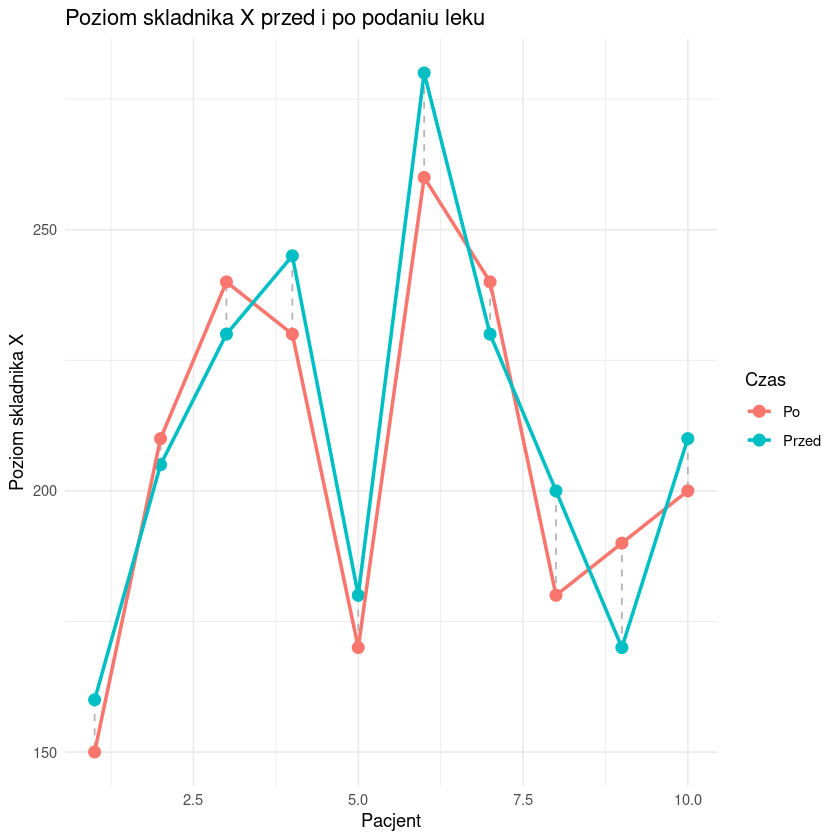

In [43]:
# chcemy zwizualicować dane
pacjenci <- 1:length(przed)
df <- data.frame(
  Pacjent = pacjenci,
  Przed = przed,
  Po = po
)

# Długa wersja danych
library(tidyr)
df_long <- pivot_longer(df, cols = c(Przed, Po), names_to = "Czas", values_to = "Wartosc")

# Wykres
library(ggplot2)
ggplot(df_long, aes(x = Pacjent, y = Wartosc, color = Czas, group = Czas)) +
  geom_line(aes(group = Pacjent), color = "gray70", linetype = "dashed") +
  geom_point(size = 3) +
  geom_line(size = 1) +
  labs(title = "Poziom skladnika X przed i po podaniu leku",
       x = "Pacjent",
       y = "Poziom skladnika X",
       color = "Czas") +
  theme_minimal()

In [38]:
# wykres liniowy zdaje się być tutaj niepoprawny. Chcieliśmy zobaczyć czy kształt zmian będzie miał podobny przebieg.
# bardziej odpowiednia wizualizacja ponizej

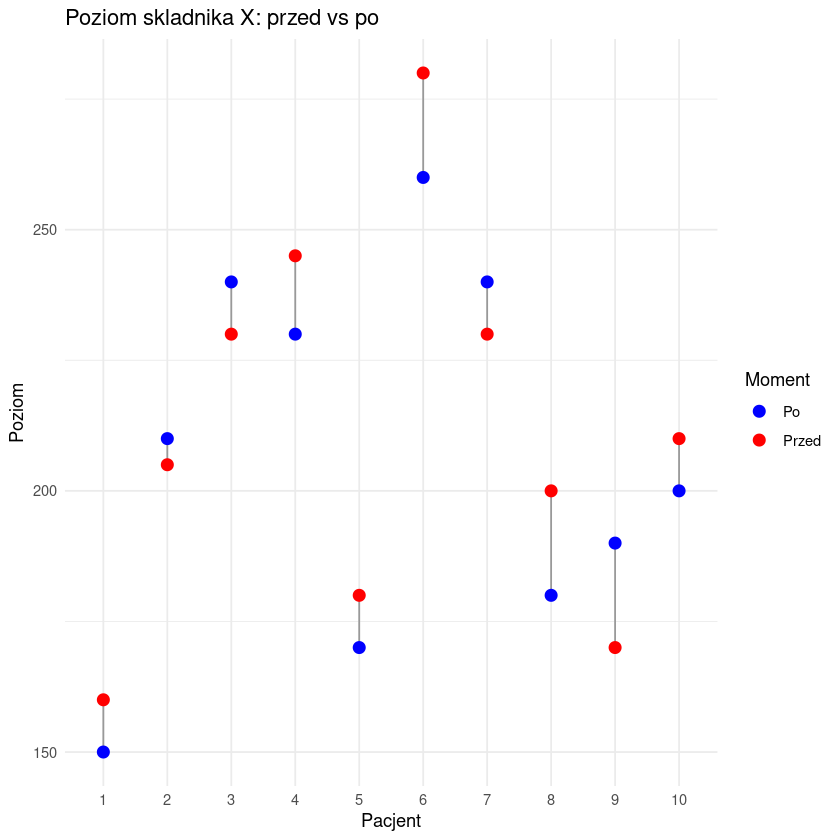

In [37]:
library(ggplot2)

# Ramka danych
df <- data.frame(
  Pacjent = factor(1:length(przed)),
  Przed = przed,
  Po = po
)

# Długa wersja do wykresu
library(tidyr)
df_long <- pivot_longer(df, cols = c(Przed, Po), names_to = "Moment", values_to = "Poziom")

# Wykres z liniami łączącymi przed i po
ggplot(df_long, aes(x = Pacjent, y = Poziom, group = Pacjent)) +
  geom_line(color = "gray60") +
  geom_point(aes(color = Moment), size = 3) +
  scale_color_manual(values = c("Przed" = "red", "Po" = "blue")) +
  labs(
    title = "Poziom skladnika X: przed vs po",
    x = "Pacjent",
    y = "Poziom",
    color = "Moment"
  ) +
  theme_minimal()


In [39]:
# Czy lek obniża X po żażyciu: wykres pokazuje, ze zachodzą takie przypadki. Należy to jednak zweryfikować

roznice <- przed - po


In [40]:
shapiro.test(roznice)


	Shapiro-Wilk normality test

data:  roznice
W = 0.89467, p-value = 0.1913


In [41]:
# poruszamy się w obszarze testów dla  dwóch średnich, w tym przypadku zależnych
# nie znaleźliśmy testem Shapiro-Wilka by różnice miały statystycznie istotną różnicę w dystrybucji od rozkładu nromalnego
# wobec tego możemy użyć t.test, jednostronny (szukamy odpowiedzi na pytanie przed > po)

t.test(przed, po, paired = TRUE, alternative = "greater")



	Paired t-test

data:  przed and po
t = 0.89692, df = 9, p-value = 0.1966
alternative hypothesis: true mean difference is greater than 0
95 percent confidence interval:
 -4.175127       Inf
sample estimates:
mean difference 
              4 


In [ ]:
# p-value jest większe od 0.05 wobec tego nie mamy podstawy do odrzucenia hipotezy zerowej.
#  Wobec czego w mocy utrzymuje się H0: Lek nie obniża poziomu składnika X

### Podsumowanie Z2: Czy lek obniża poziom składnika X
Czy można wnioskować, że lek obniża średnio poziom X?

-- Nie.



#### Hipotezy:
- Hipoteza zerowa (H0): Średnia różnica ≤ 0 (lek nie obniża poziomu składnika X)
- Hipoteza alternatywna (H1): Średnia różnica > 0 (lek obniża poziom składnika X)


#### Założenia:
- Dane pochodzą od tych samych pacjentów (próby zależne)
- Różnice mają rozkład normalny (sprawdzone testem Shapiro-Wilka)

#### Wyniki testu t (dla prób zależnych, jednostronny):
- Statystyka t: 0.8969  
- p-value: 0.1966  
- Przedział ufności 95%: [–4.18, ∞)  
- Średnia różnica (przed - po): 4 jednostki
#### Wyniki testu t:
- Statystyka t: -2.0996  
- p-value: 0.04935  
- Przedział ufności 95%: [-8.10, -0.01]  
- Średnia (plantacja 1): 74.55 g  
- Średnia (plantacja 2): 78.60 g

#### Wniosek:
Wnioskujemy, że nie ma statystycznie istotnych dowodów na to, że lek obniża poziom składnika X we krwi.

## Zadanie 3:

**Polecenie:**  

Pierwszą monetą rzucono 100 razy i otrzymano 46 orłów, drugą
monetą rzucono 50 razy i otrzymano 21 orłów, trzecią monetą
rzucono 60 razy i otrzymano 26 orłów.

Zweryfikować hipotezę, że prawdopodobieństwo wyrzucenia orła jest
takie samo dla wszystkich monet.

kolejne pozycje w strukturze reprezentują kolejne monety

Dane:  
- Liczba orłów: `orly = c(46, 21, 26)`
- Liczba rzutów: `rzuty = c(100, 50, 60)`
- Liczba reszek: `reszki = rzuty - orly`

**Hipotezy:**
- H0: Prawdopodobieństwo wyrzucenia orła jest takie samo dla wszystkich monet (p₁ = p₂ = p₃)
- H0: Co najmniej jedna moneta ma inne prawdopodobieństwo (pᵢ ≠ pⱼ)

Z konstukcji zadania wynika, że wartości na kolejnych pozycjach odpowiadają sobie wzajemnie przed/po.

In [44]:
orly <- c(46, 21, 26)
rzuty <- c(100, 50, 60)
reszki <- rzuty - orly

In [45]:
dane <- rbind(orly, reszki)

In [48]:
colnames(dane) <- c("Moneta1", "Moneta2", "Moneta3")
rownames(dane) <- c("Orzel", "Reszka")

In [49]:
dane

,Moneta1,Moneta2,Moneta3
Orzel,46,21,26
Reszka,54,29,34


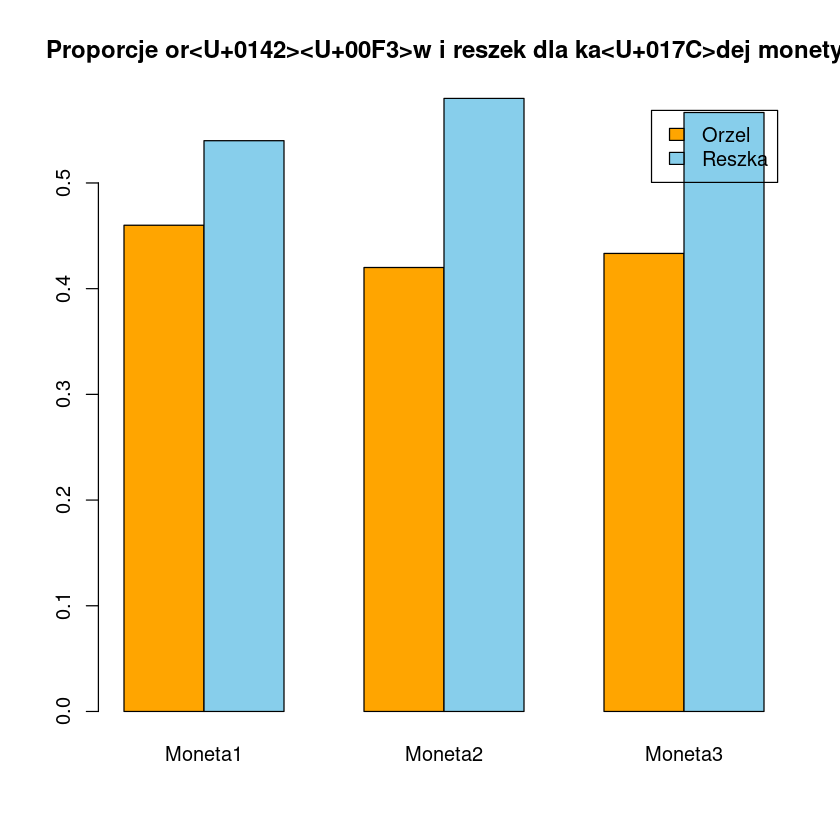

In [53]:

dane_prop <- prop.table(dane, 2)  # proporcje w kolumnach
barplot(dane_prop, beside = TRUE,
        col = c("orange", "skyblue"),
        legend = rownames(dane),
        main = "Proporcje orlow i reszek dla kazdej monety")


In [ ]:
# wizualnie żadna z monet zdaje się nie odbiegać znacznie od reszty

In [50]:
test_chi <- chisq.test(dane)

In [51]:
test_chi


	Pearson's Chi-squared test

data:  dane
X-squared = 0.24704, df = 2, p-value = 0.8838


In [52]:
# oczekiwane liczności
test_chi$expected

,Moneta1,Moneta2,Moneta3
Orzel,44.28571,22.14286,26.57143
Reszka,55.71429,27.85714,33.42857


In [55]:
# żadna liczność oczekiwana nie jest mniejsza od 1
# nie więcej niż 20-25% liczości oczekiwanych jest mniejszych niż 5
# warunki dla testu chi-kwadrat zostały spełnione
# nie znaleźliśmy statystycznie istnotnego powodu dla odrzucenia H0 - 


### Podsumowanie Z3: Rzut monetą
Czy można twierdzić, że prawdopodobieństwo wyrzucenia orła jest takie samo dla wszystkich monet?

-- Tak, **brak podstaw do odrzucenia hipotezy zerowej**.



#### Hipotezy:
- Hipoteza zerowa (H0): Prawdopodobieństwo wyrzucenia orła jest **takie samo** dla wszystkich trzech monet
- Hipoteza alternatywna (H1): Co najmniej jedna moneta ma **inne** prawdopodobieństwo wyrzucenia orła



#### Założenia:
- Dane są niezależne (każda próba dotyczy innej monety)
- Liczności oczekiwane spełniają warunki testu chi-kwadrat:
  - żadna < 1  
  - nie więcej niż 25% < 5  

#### Dane:
- Moneta 1: 46 orłów / 100 rzutów
- Moneta 2: 21 orłów / 50 rzutów
- Moneta 3: 26 orłów / 60 rzutów

#### Wniosek:
Wnioskujemy, że nie ma statystycznie istotnych dowodów na różnice międz<y monetami.Możemy przyjąć, że **wszystkie trzy monety mają to samo prawdopodobieństwo wyrzucenia orła**.